# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

[ megoldás helye ]

## A lineáris harmónikus oszcilátor

Az $m$ tömegű egydimenziós harmonikus oszcillátorra $ F = -kz$ erő hat, ahol $k$ egy pozitív állandó. Konzervatív erőtereknél az $erő$ előáll a potenciál negatív gradienseként.
$$ F_{(r)} = - grad V_{(r)} $$

Így ugyanezen analógia alapján számolom ki e két anharmonikus oszcillátorhoz tartozó erőket.
### Első
* Negyedrendű potenciál
$$ V(x) = \frac{1}{4}kx^4 $$
Amiből az $erő$ $$F_{(x)} = - kx^3 $$

### Második
* Lennard-Jones potenciál
$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$
Amiből az $erő$ 
$$ F(x) = 12V_0 \left[ \left( \frac{x_0^{12}}{x^{13}} \right ) - \left (\frac{x_0^{6}}{x^{7}} \right) \right] $$

# 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

In [1]:
%pylab inline 
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def harm_plot():
    
    xV = linspace(-4,4,100)
    xF = linspace(-3,3,100)    
    yV = (1/2)* xV**2;
    yF = -xF;
    figsize(10,10)
   
    return xV,yV,xF,yF

In [3]:
def negyed_plot():
    []
    xV = linspace(-4,4,100)
    xF = linspace(-2,2,100)
    yV= (1/4) * xV**4;
    yF= - xF**3;
    return xV,yV,xF,yF

In [4]:
def lenjo_plot(v0,x0):
    
    xF = linspace(1.1,2,100)
    xV = linspace(1.001,2.5,100)
    zF=12*v0*(((x0**12/xF**13)-(x0**6/xF**7)));
    zV=v0*(((x0/xV)**12)-2*(x0/xV)**6);
    return zF,zV,xF,xV

In [5]:
def erö():
    figsize(15,10)
    xlabel('Távolság', fontsize = '15')
    ylabel('Erő', fontsize = '15')
    title('Az erők egy közös ábrán')
    xlim(-2,2.5)
    ylim(-7.5,7.5)
    plt.plot(harm_plot()[2],harm_plot()[3], linestyle='-', color = "r", label='Harmónikus rezgőmozgás erőfüggvénye')
    plt.plot(negyed_plot()[2],negyed_plot()[3], linestyle='-', color = "g",label='Negyedrendű potenciál erő függvénye')
    plt.plot(lenjo_plot(3,1.2)[3],lenjo_plot(3,1.2)[1], marker='', linestyle='-', color = "b", label='Lennard-Jones potenciál erő függvénye')
    legend(loc='upper left')   

In [ ]:
erö()

In [6]:
def pot():
    plt.plot(harm_plot()[0],harm_plot()[1], marker = 'o', linestyle='-', label='Harmónikus potenciál')
    plt.plot(negyed_plot()[0],negyed_plot()[1], marker = 'o', linestyle='-', label='Negyedrendű potenciál')
    plt.plot(lenjo_plot(3,1.2)[2],lenjo_plot(3,1.2)[0], marker='o', linestyle='-', label='Lennard-Jones potenciál')

    figsize(15,15)
    xlabel('Távolság', fontsize = '15')
    ylabel('Potenciál', fontsize = '15')
    title('Az erők egy közös ábrán')

In [ ]:
pot()

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

## Harmónikus rezgőmozgás problémája

Természetesen az $$F = -Dr$$ alapesetből indulunk ki, ahol $F$ az erő, $D$ az ugynevezett direkciós állandó ami egy rugóval jellenezhető esetben a rugót jellemző állandó, $r$ egy vektor, ami pedig a kitérés. Mechanika tanulmányainkból tudjuk, hogy a mozgásegyenlete ennek a problémának, $$m \ddot r = -Dr$$
Ez egyenlet felírása után be kell vezetnem a $${\omega}^2 = \frac {D}{m}$$ mennyiséget, ahol $\omega$ a körfrekvencia nevet viseli. A kör+ frekvenciával a következő alakra tudom hozni az egyenletemet, $$\ddot r + {\omega}^2 r = 0$$
Ez egy másodrendű, állandó együtthatójú, homogén közönséges differenciálegyenlet, melynek tudjuk, hogy két megoldása van.Ezen differenciálegyenlet megoldásával kapom meg a partikuláris, majd az álltalános megoldást, majd kezdeti feltételeket megadva eljutunk a keresett potenciálhoz amiből egy gradiensképzéssel megkapjuk az erőt, mivel a tér amiben dolgoztunk potenciálos.Esetünkben egy egydimenziós mozgést fogok modellezni amit a $$\ddot x + {\omega}^2 x = 0$$ egyenlet jellemez.
Amit a megoldáshoz egy elsőrendű diffegyenletre vezetünk vissza.
$$v = \dot x$$
$$ \frac{F}{m} = \dot v$$

In [7]:
import numpy as np
from scipy.integrate import RK45

In [82]:
def lenjo_plot(n):
    y_k = np.array([1.5,0])

    def len_jopot(t,y):
        m,x0,v0 = 1, 1, 1;
        dx = y[1];
        dv = 12*x0*(((x0**12/y[0]**13)-(x0**6/y[0]**7))/m);
        return dx, dv

    rk = RK45(len_jopot,0,y_k, 100,rtol=0.00001);
    t = np.zeros(n)
    y = np.empty((np.shape(t)[0],rk.y.shape[0]))

    for i in range(n):
        t[i] = rk.t
        for j in range(rk.y.shape[0]):
            y[i,:]=rk.y
        rk.step()
    
    y1 = y[:,0]
    y2 = y[:,1]

    return t, y1, y2

In [83]:
def negyed_plot(n):
    y_k = np.array([10,10])

    def negyed_pot(t,y):
        x0, m = 0,1;
        dx = y[1];
        dv = -(y[0]**3)/m;
        return dx, dv

    rk = RK45(negyed_pot,0,y_k, 100,rtol=0.00001);
    t = np.zeros(n)
    y = np.empty((np.shape(t)[0],rk.y.shape[0]))

    for i in range(n):
        t[i] = rk.t
        for j in range(rk.y.shape[0]):
            y[i:,j]=rk.y[j]
        rk.step()
        
    y1 = y[:,0]
    y2 = y[:,1]

    return t, y1,y2

In [84]:
def harm_plot(n):
    y_k = np.array([1,1])

    def harm_oszc(t,y):
        x, m = 1,1;
        dx = y[1];
        dv = -(y[0]/m);
        return dx, dv

    rk = RK45(harm_oszc,0,y_k, 100, rtol=0.00001);
    t = np.zeros(n)
    y = np.empty((np.shape(t)[0],rk.y.shape[0]))

    for i in range(n):
        t[i] = rk.t
        for j in range(rk.y.shape[0]):
            y[i,:]=rk.y
        rk.step()
        
    y1 = y[:,0]
    y2 = y[:,1]

    return t, y1,y2

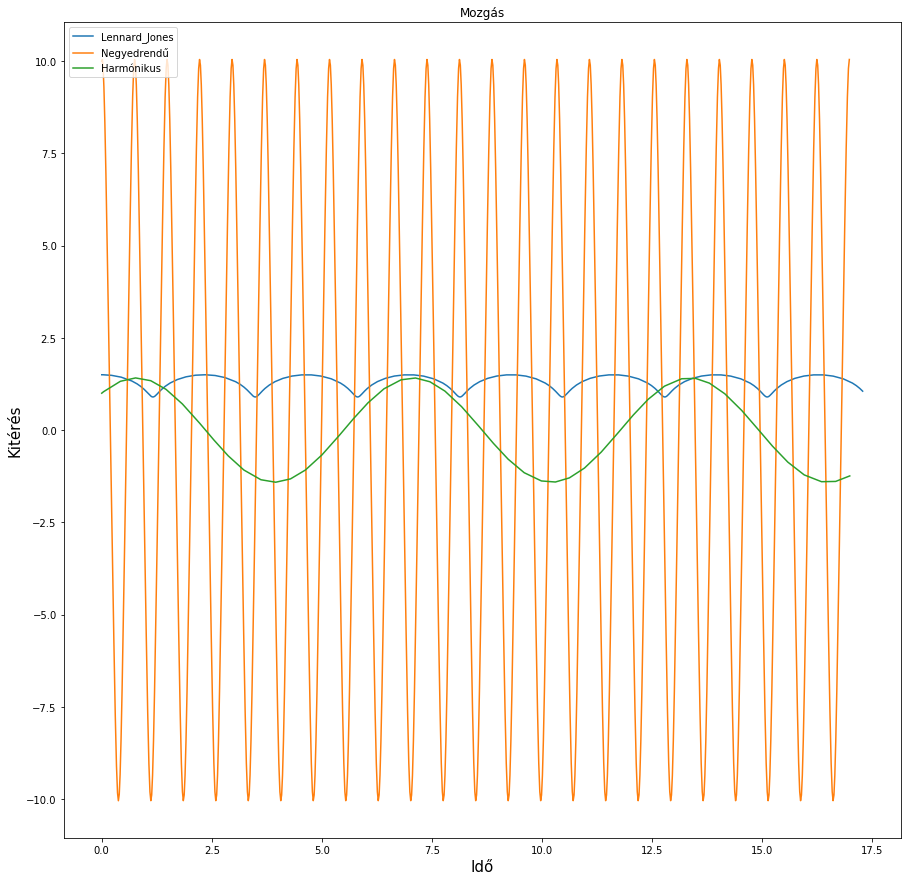

In [85]:
def move():
    
    plot(lenjo_plot(190)[0],lenjo_plot(190)[1], label = "Lennard_Jones")
    plot(negyed_plot(600)[0],negyed_plot(600)[1], label = "Negyedrendű")
    plot(harm_plot(50)[0],harm_plot(50)[1], label = "Harmónikus")
   
    figsize(15,15)
    xlabel('Idő', fontsize = '15')
    ylabel('Kitérés', fontsize = '15')
    title('Mozgás')
    legend(loc='upper left')
move()    

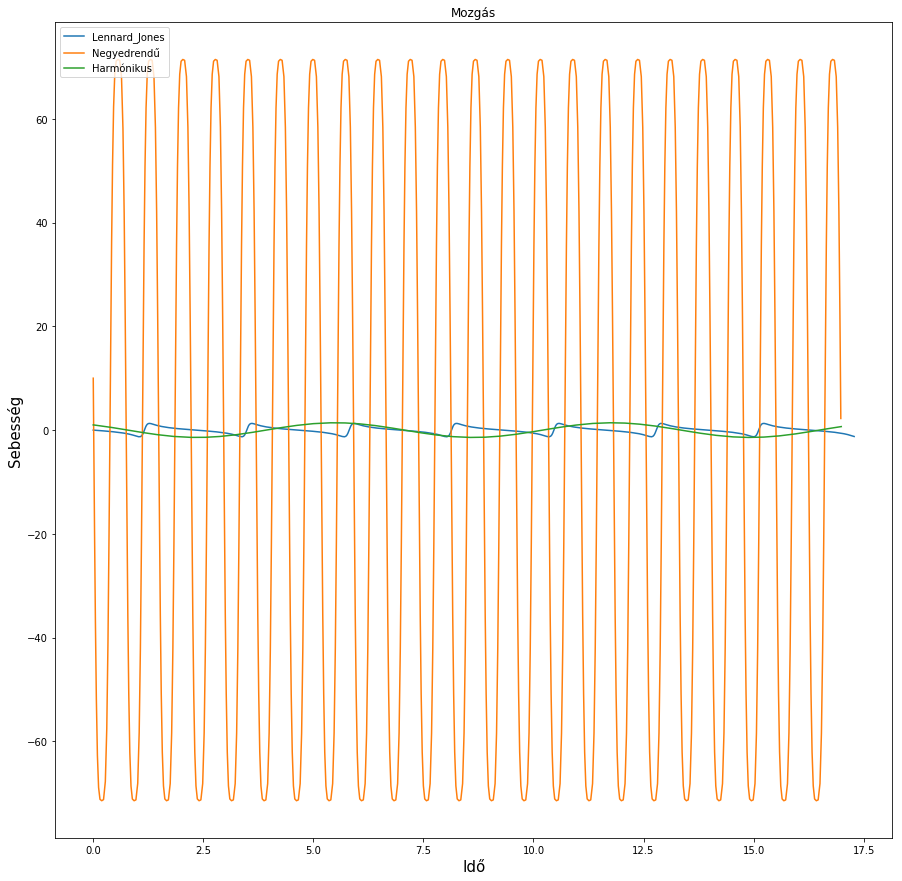

In [86]:
def velo():
    
    plot(lenjo_plot(190)[0],lenjo_plot(190)[2], label = "Lennard_Jones")
    plot(negyed_plot(600)[0],negyed_plot(600)[2], label = "Negyedrendű")
    plot(harm_plot(50)[0],harm_plot(50)[2], label = "Harmónikus")

    
    
    figsize(15,15)
    xlabel('Idő', fontsize = '15')
    ylabel('Sebesség', fontsize = '15')
    title('Mozgás')
    legend(loc='upper left')
velo()

# 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

In [88]:
from scipy.interpolate import interp1d

In [89]:
def lenjo_int():
    #Lineáris megoldás
    f1 = interp1d(lenjo_plot(190)[0],lenjo_plot(190)[1] ,kind = 'linear')
    xnew = np.linspace(0,max(lenjo_plot(190)[0]),10000)
    #Köbös megoldás
    f2 = interp1d(lenjo_plot(190)[0],lenjo_plot(190)[1] ,kind = 'cubic')
    return xnew, f1(xnew),f2(xnew)
    
def lenjo_int_plot():   
    figsize(15,15)
    plot(lenjo_int()[0],lenjo_int()[1], label = "Lineáris")
    legend(loc='upper left')
    title("Lennard-Jones")
    plot(lenjo_int()[0],lenjo_int()[2], label = "Köbös")
    legend(loc='upper left')

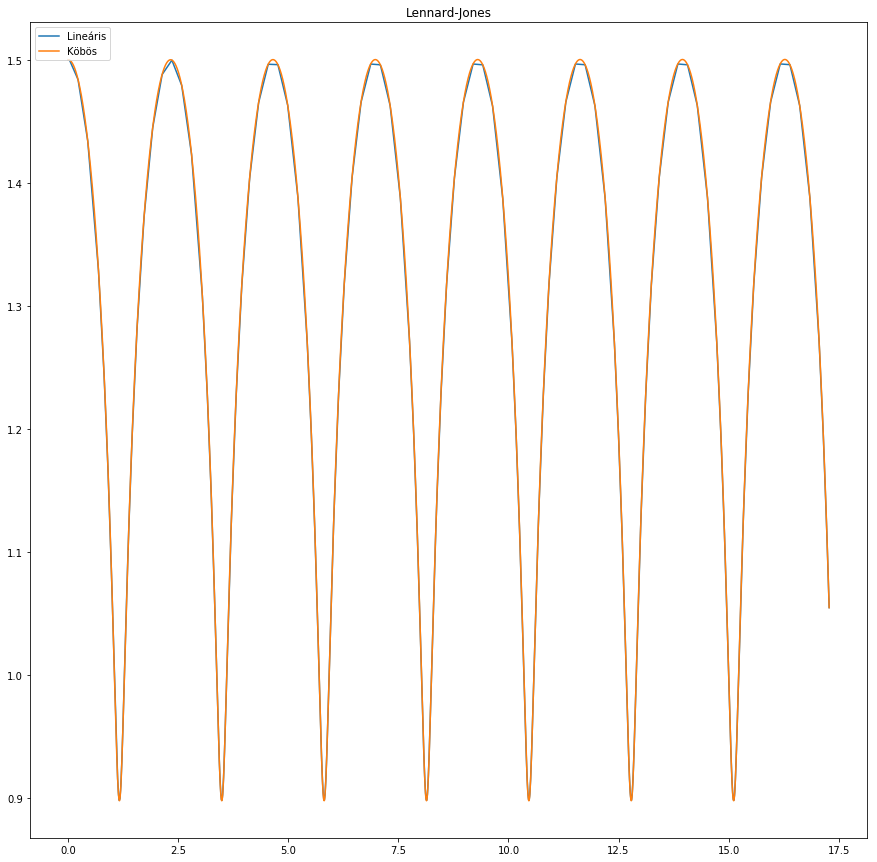

In [90]:
lenjo_int_plot()

In [91]:
def negyed_int():
    figsize(15,15)
    #Linéáris megoldás
    f1 = interp1d(negyed_plot(600)[0],negyed_plot(600)[1],kind = 'linear')
    xnew = np.linspace(0,max(negyed_plot(600)[0]),10000)
    #köbös megoldás
    f2 = interp1d(negyed_plot(600)[0],negyed_plot(600)[1],kind = 'cubic')

    return xnew, f1(xnew),f2(xnew)

def negyed_int_plot():    
    title("Lennard-Jones")
    plot(negyed_int()[0],negyed_int()[2], label = "Köbös")
    legend(loc='upper left')
    plot(negyed_int()[0],negyed_int()[1], label = "Lineáris")
    legend(loc='upper left')

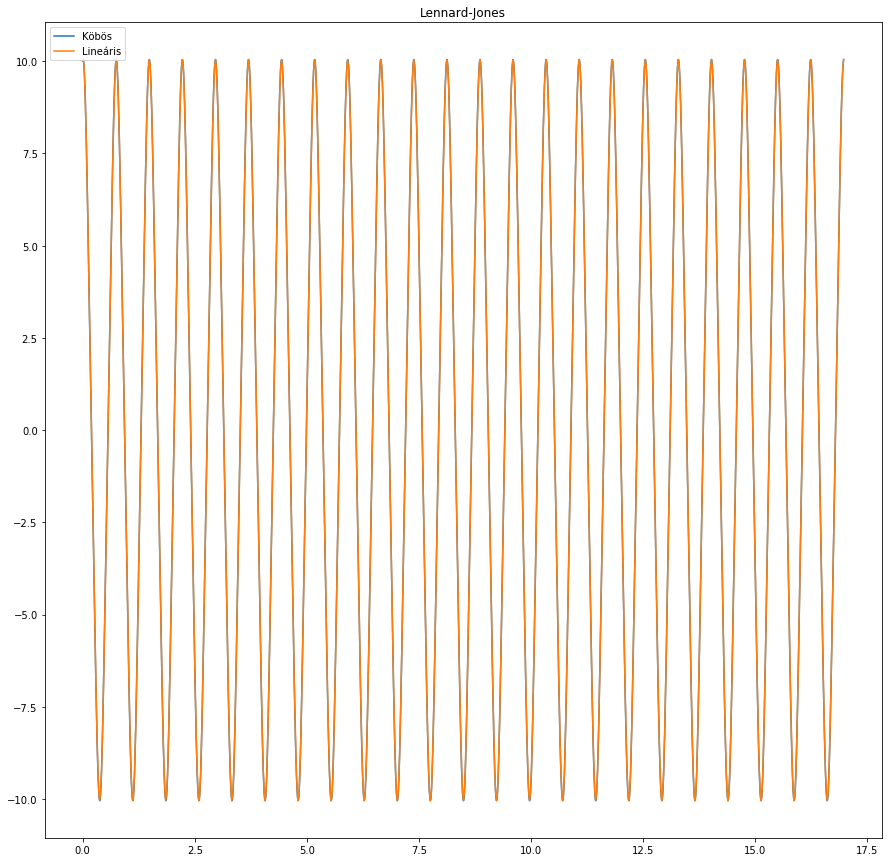

In [92]:
negyed_int_plot()

In [93]:
def harm_int():        
#interpoláció 
    figsize(15,15)
    
    xnew = np.linspace(0,max(harm_plot(50)[0]),10000)

    f1 = interp1d(harm_plot(50)[0],harm_plot(50)[1] ,kind = 'linear')  #Linéáris megoldás
    f2 = interp1d(harm_plot(50)[0],harm_plot(50)[1] ,kind = 'cubic')    #Köbös megoldás
    
    return xnew, f1(xnew),f2(xnew)

def harm_int_plot():
    title("Harmónikus oszcillátor")
    plot(harm_int()[0],harm_int()[2], label = "Köbös")
    legend(loc='upper left')
    plot(harm_int()[0],harm_int()[1], label = "Lineáris")
    legend(loc='upper left')

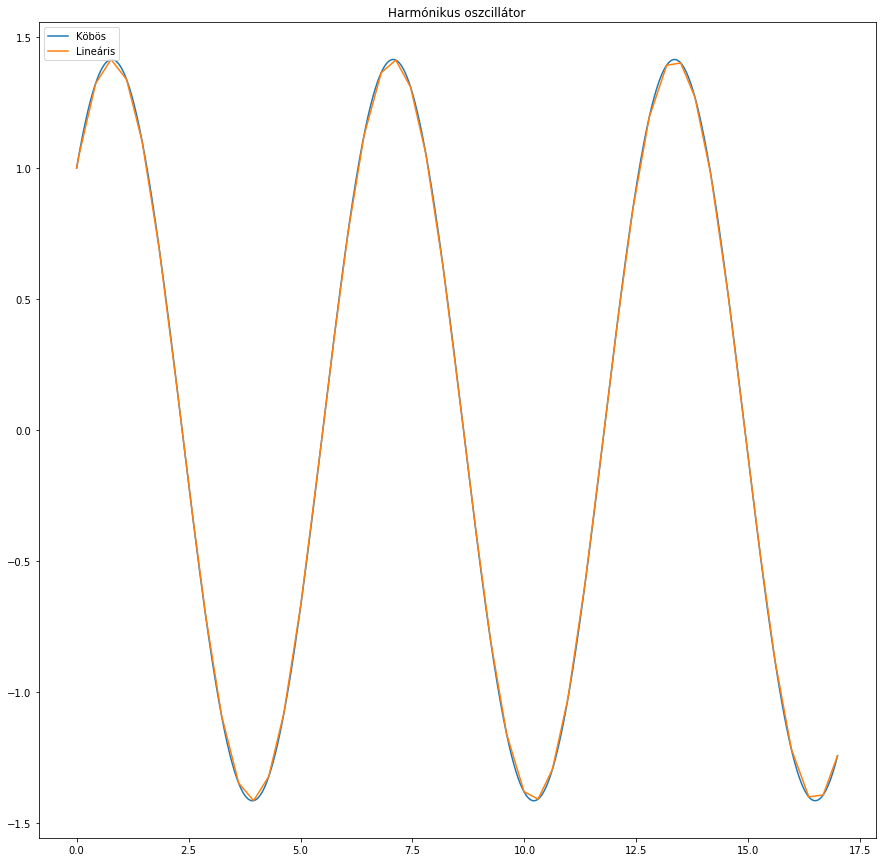

In [94]:
harm_int_plot()

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

In [95]:
from numpy.fft import *              # Fourier-analízishez használt rutinok
from scipy.signal import spectrogram

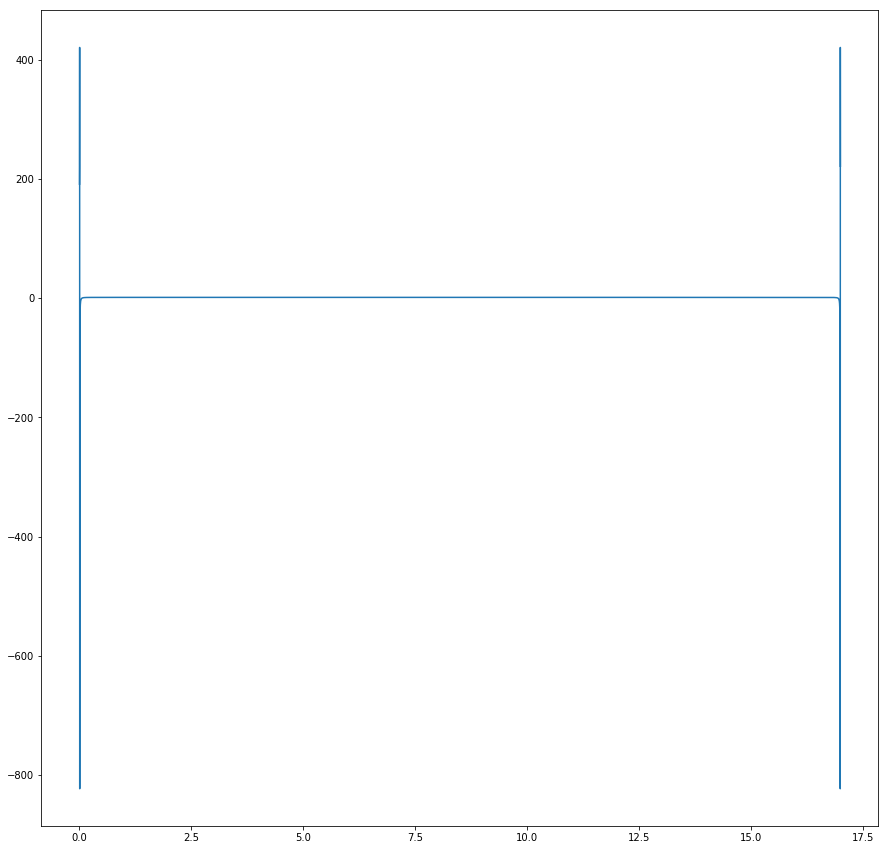

In [96]:
#Harmonikus oszcillátor
fl = np.fft.rfft(harm_int(tt))
plot(np.real(harm_int()[0]),fft(harm_int()[2]))

(-1e-05, 1e-05)

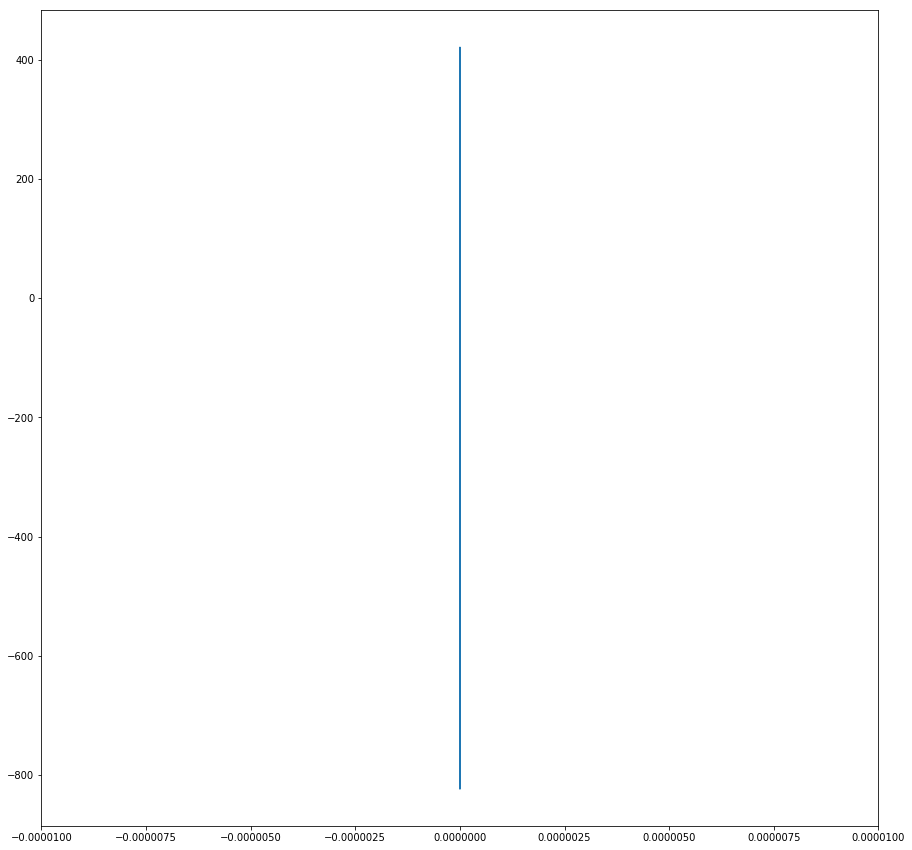

In [40]:
#ez az imaginárius egység
plot(np.imag(harm_int()[0]),fft(harm_int()[2]))
xlim(-0.00001,0.00001)

(-0.001, 0.01)

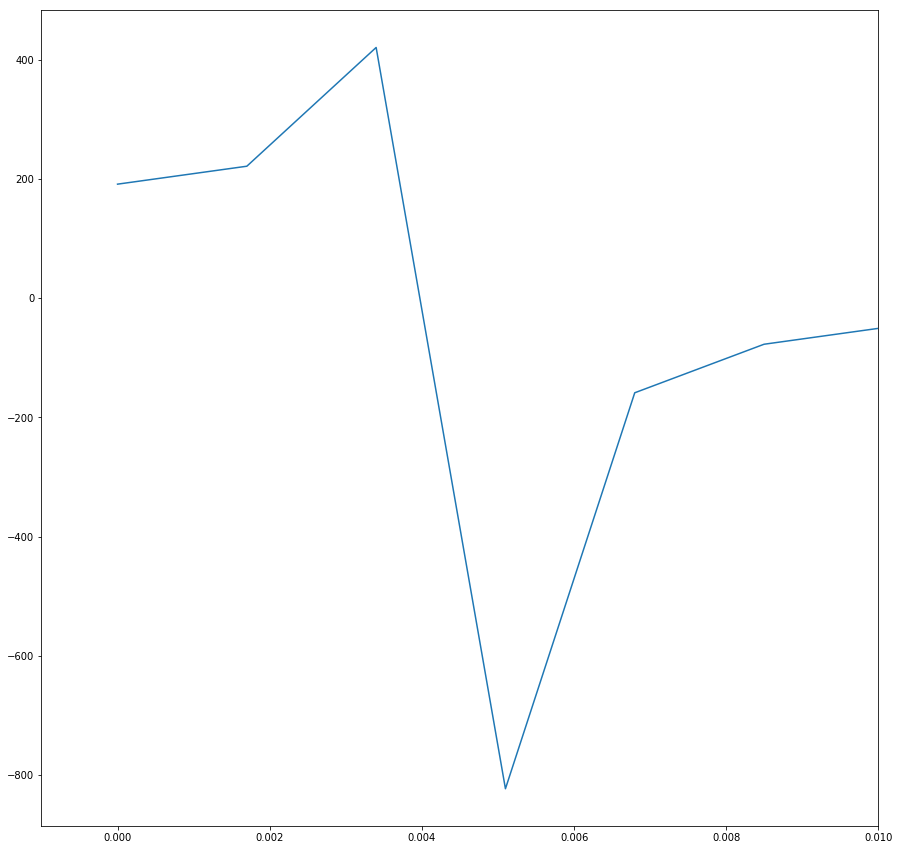

In [41]:
#Harmónikus oszcillátor közelebbről
plot(np.real(harm_int()[0]),fft(harm_int()[2]))
xlim(-0.001,0.01)

(2, 10)

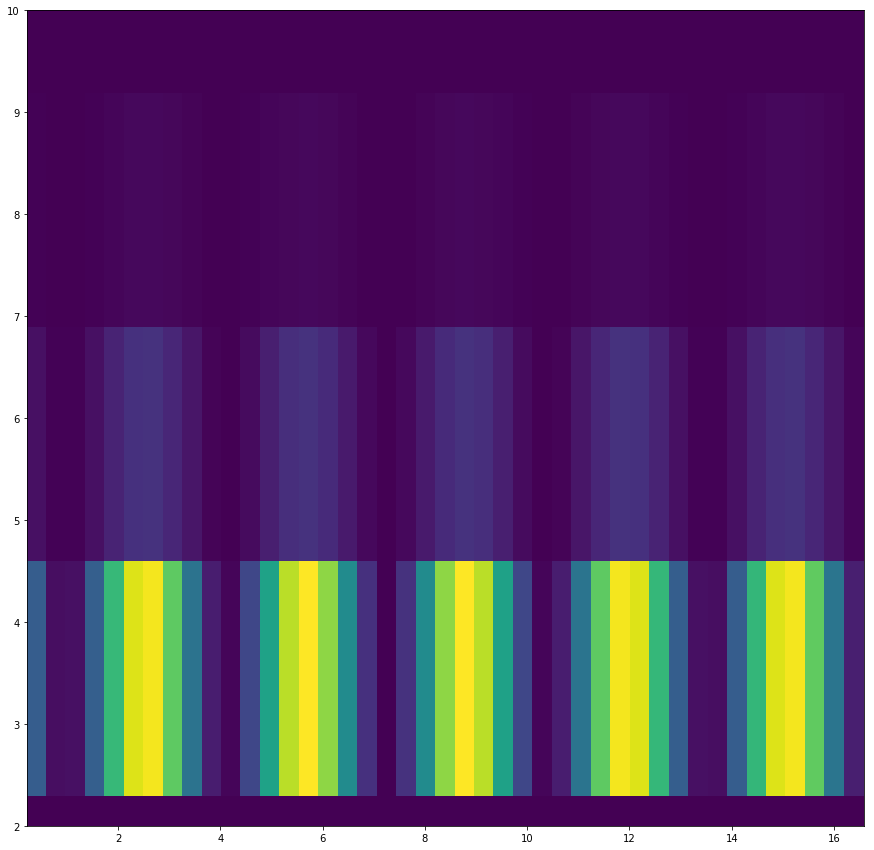

In [45]:
#Egy kis spektogramm just for fun
fs=len(harm_int()[0])/max(harm_int()[0]) # az idő függő jel mintavételezési frekvenciájának meghatározása
freqs,ts,Scsirp=spectrogram(harm_int()[2],fs)
pcolor(ts,freqs,Scsirp)
ylim(2,10)

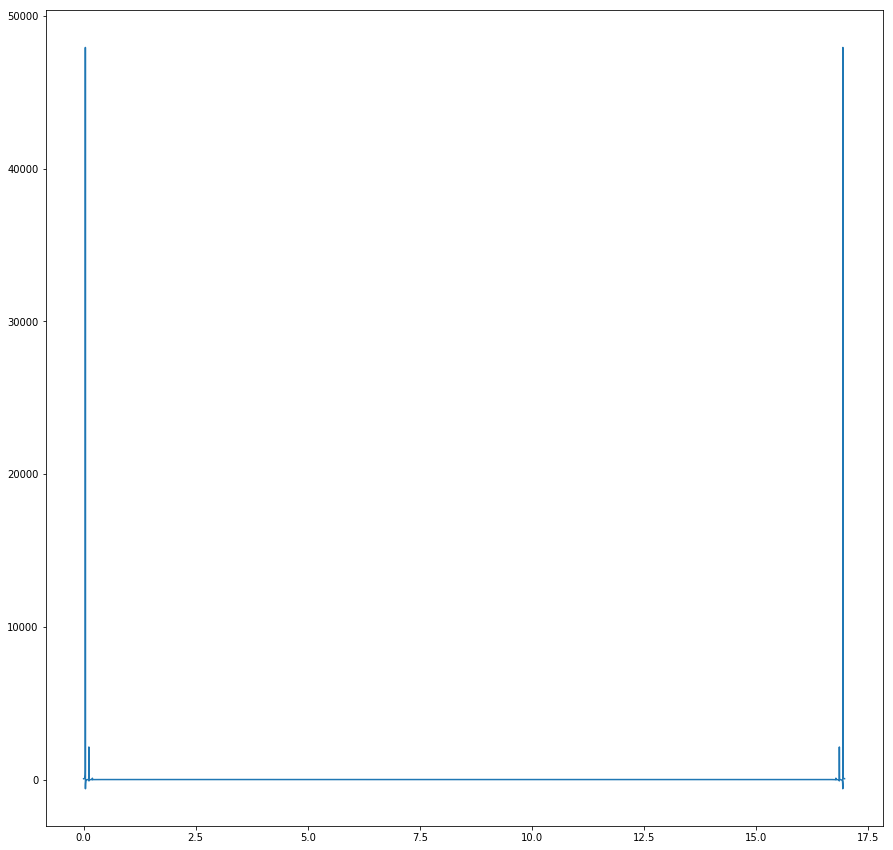

In [46]:
#Negyedrendű
plot(negyed_int()[0],fft(negyed_int()[2]))

(-0.02, 0.15)

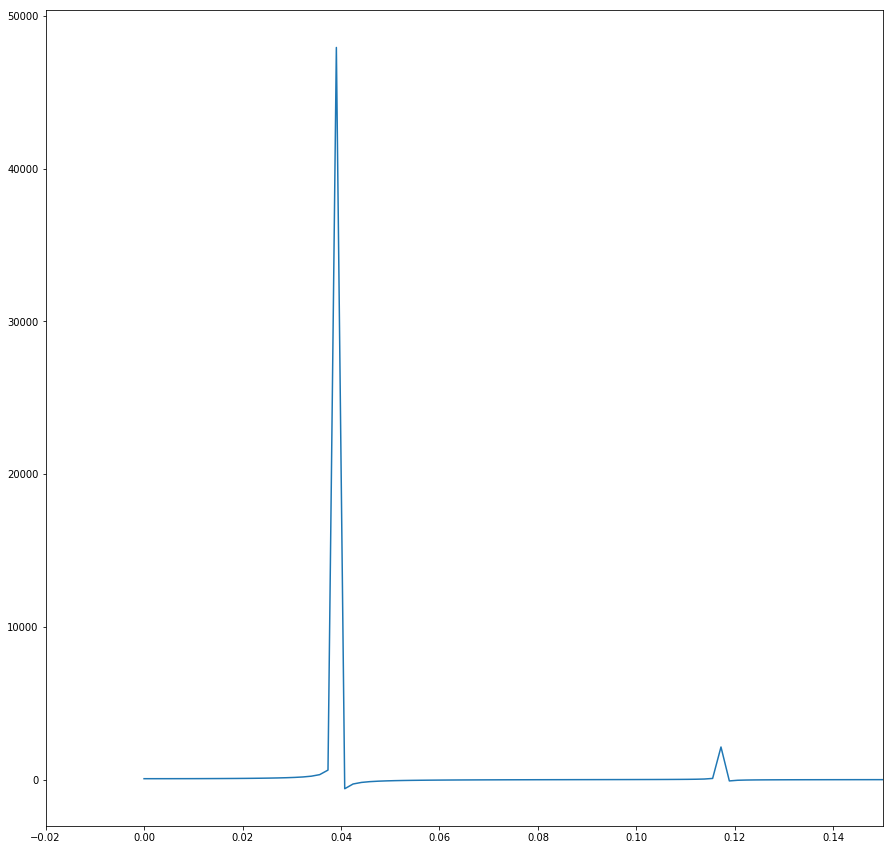

In [51]:
#Negyedrendű oszcillátor közelebbről
plot(negyed_int()[0],fft(negyed_int()[2]))
xlim(-0.02,0.15)

(2, 8)

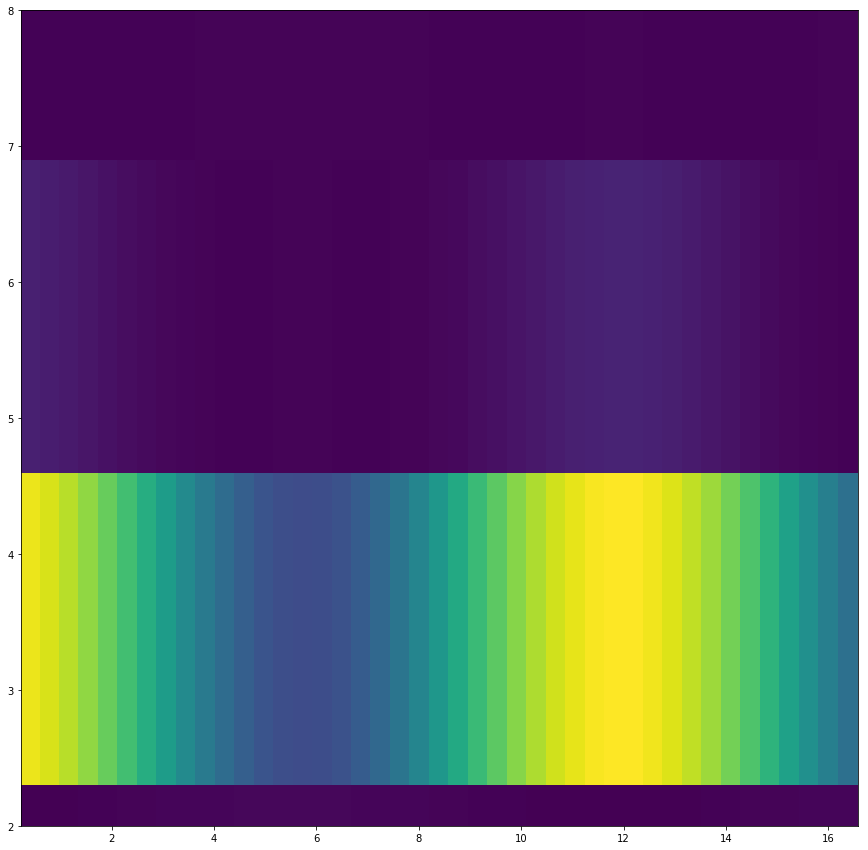

In [56]:
#Egy kis spektogramm just for fun
fs=len(negyed_int()[0])/max(negyed_int()[0]) # az idő függő jel mintavételezési frekvenciájának meghatározása
freqs,ts,Scsirp=spectrogram(negyed_int()[2],fs)
pcolor(ts,freqs,Scsirp)
ylim(2,8)

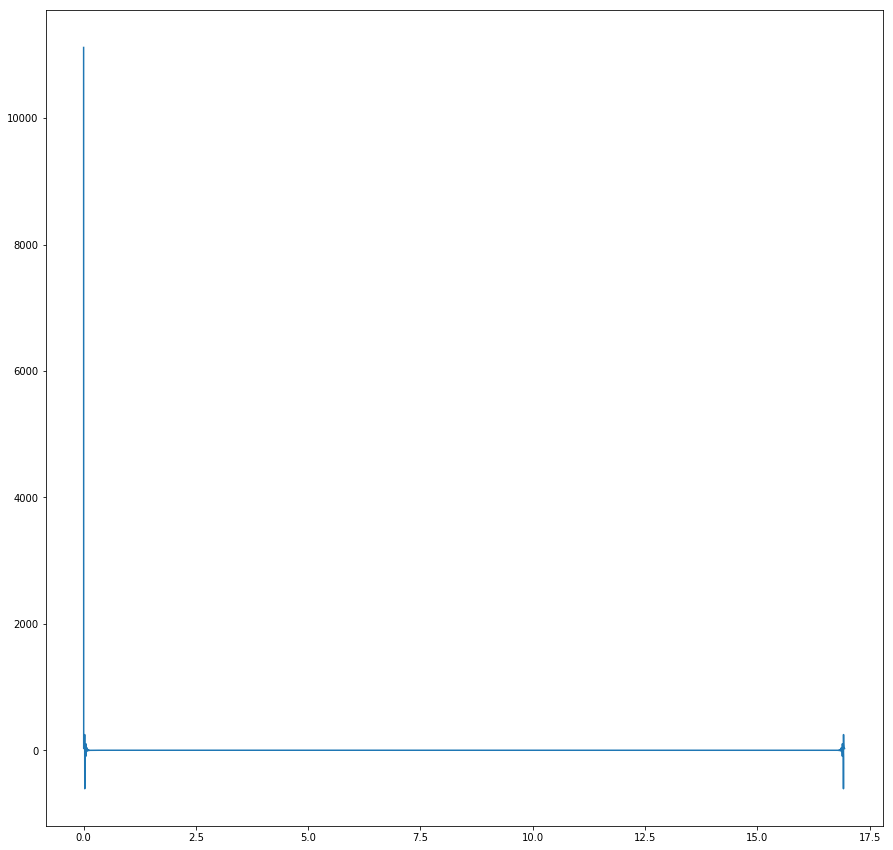

In [57]:
#Lennard_Jones
plot(lenjo_int()[0],fft(lenjo_int()[2]))

(0, 0.003)

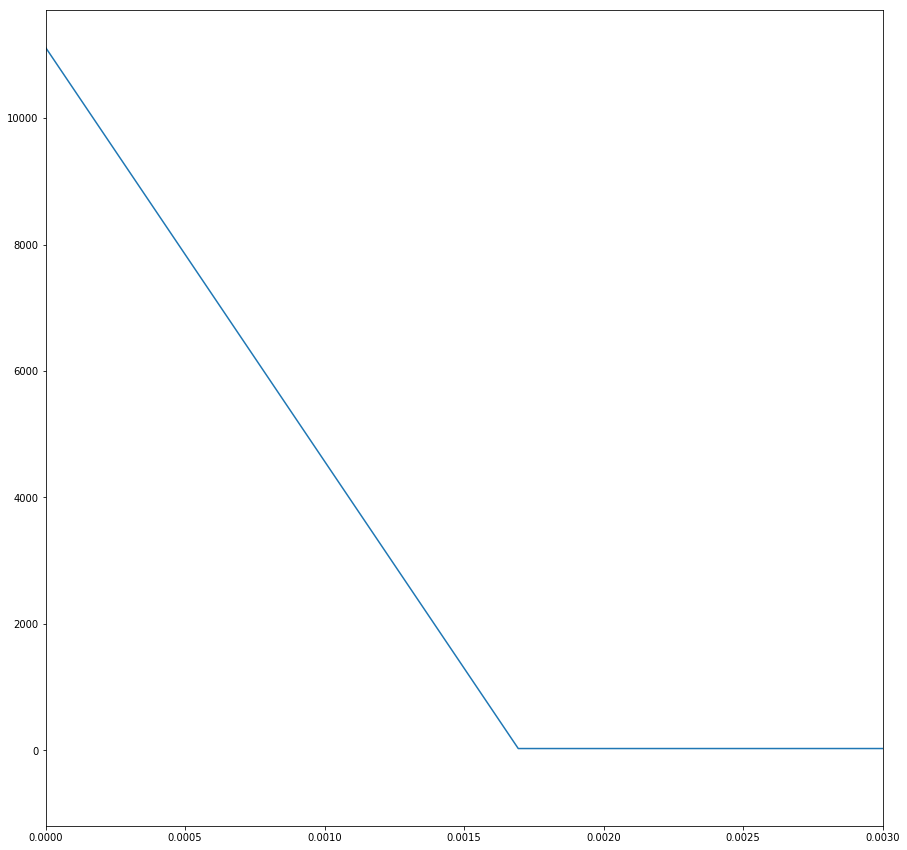

In [58]:
#Lennard_Jones közelebbről
plot(lenjo_int()[0],fft(lenjo_int()[2]))
xlim(0,0.003)

(0, 10)

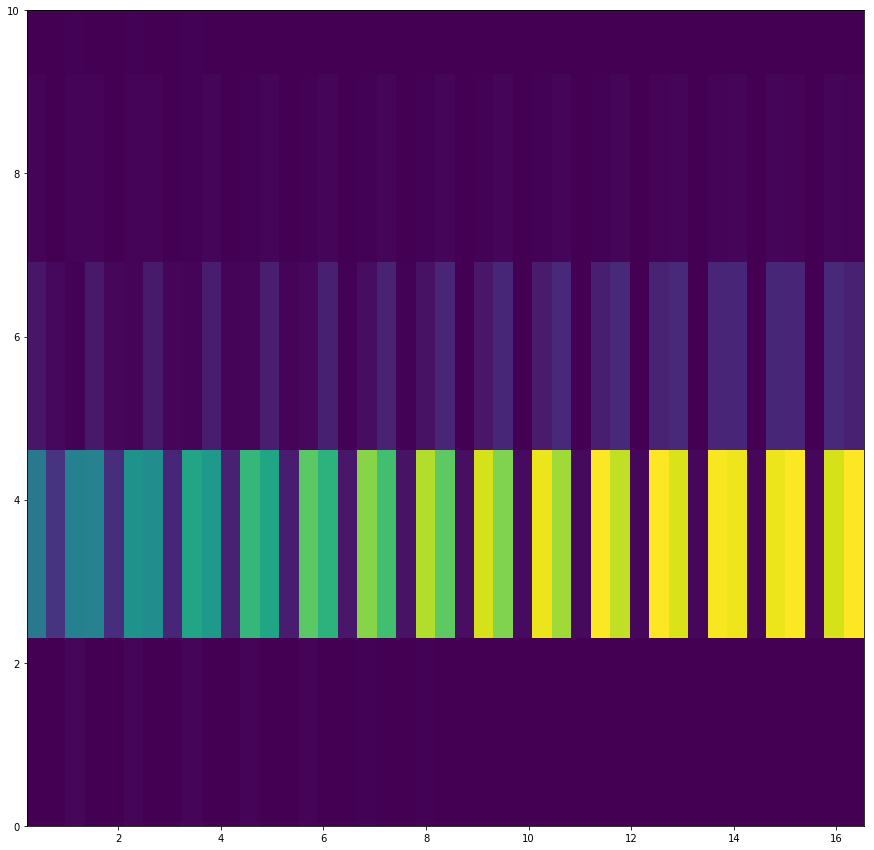

In [61]:
fs=len(lenjo_int()[0])/max(lenjo_int()[0]) # az idő függő jel mintavételezési frekvenciájának meghatározása
freqs,ts,Scsirp=spectrogram(lenjo_int()[2],fs)
pcolor(ts,freqs,Scsirp)
ylim(0,10)

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf